# Use Louvain Algorithm to find community in Cat Brain Network

In [1]:
#import the required packges 
# network analysis package
import networkx as nx
# graphing/plotting package
import matplotlib.pyplot as plt
from matplotlib import rc
# python's numerical library 
import numpy as np
# package for downloading files 
import requests
# force matplotlib to plot inline 
from scipy import stats
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#import data

data_url = 'https://people.rit.edu/nxmsma/courses/data/cat_brain.graphml'
r = requests.get(data_url)
open('cat_brain.graphml', 'wb').write(r.content);

G=nx.read_graphml('cat_brain.graphml')

In [3]:
print(nx.is_directed(G))

True


In [4]:
# change network from directed to undirected
G0 = G.to_undirected()

print(nx.is_directed(G0), 'number of edges=',G.number_of_edges(),',number of nodes=',G.number_of_nodes())

False number of edges= 1139 ,number of nodes= 65


In [9]:
# install the package community, this package has functions to carry out Louvain Algorithm 
!pip install python-louvain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 204.6/204.6 kB 4.4 MB/s eta 0:00:00a 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for python-louvain: filename=python_louvain-0.16-py3-none-any.whl size=9389 sha256=e6b761e9e1169361262e82dd6a97fe5899da2130e72e7c8a9ea2ef38611605d6
  Stored in directory: /Users/kapoor/Library/Caches/pip/wheels/4d/7c/b6/79b198e4ec43f915fbdf967953d48b89a18893b12aa9df0ae2
Successfully built python-louvain


In [10]:
# import community detection algo. 
from community import community_louvain

In [11]:
# Using Louvain find best partition

part = community_louvain.best_partition(G0)
commu_idx=list(part.values()); no_of_commu=np.max(commu_idx)
print('Number of communities found using best partition:',no_of_commu+1)

Number of communities found using best partition: 4


In [12]:
#create a colormap for plotting

import matplotlib as mpl

cmap1=[(251/255.0,142/255.0,165/255.0),
    (50/255.0,195/255.0,206/255.0),
(161/255.0,215/255.0,106/255.0),
(216/255.0,218/255.0,235/255.0),
(216/255.0,168/255.0,215/255.0),
(116/255.0,168/255.0,235/255.0),
(201/255.0,102/255.0,94/255.0),
(181/255.0,172/255.0,94/255.0),
(251/255.0,150/255.0,114/255.0)]

cm1 = mpl.colors.ListedColormap(cmap1[0:no_of_commu+1])
cm2 = mpl.colors.ListedColormap(cmap1[no_of_commu+1:no_of_commu+5])

In [13]:
# create a dictionary with different values assigned to various classes in the data

ndl=list(G.nodes())
comm_l=list(part.values())

visual=ndl[0:18]; v_v=stats.mode(comm_l[0:18])[0][0]
auditory=ndl[18:28]; a_v=stats.mode(comm_l[18:28])[0][0]
somatomotor=ndl[28:46];  s_v=stats.mode(comm_l[28:46])[0][0]
frontolimbic=ndl[46:65]; f_v=stats.mode(comm_l[46:65])[0][0]

ndl_c={}



for i in visual: 
    ndl_c[i]=v_v
    
for i in auditory: 
    ndl_c[i]=a_v

for i in somatomotor: 
    ndl_c[i]=s_v

for i in frontolimbic: 
    ndl_c[i]=f_v

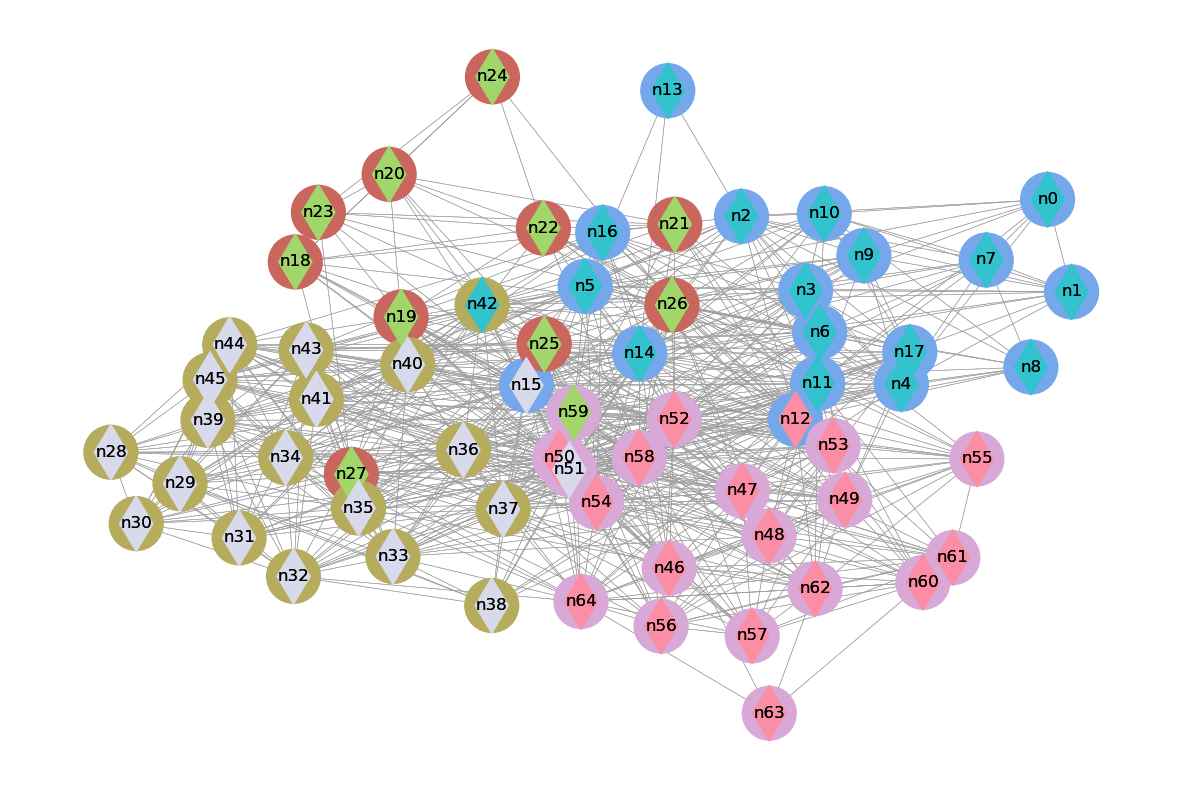

In [14]:
plt.figure(figsize=(15,10)); plt.axis('off')
pos1=nx.kamada_kawai_layout(G0)

nx.draw_networkx(G0,pos1,node_color=list(ndl_c.values()),edge_color='#9f9f9f',alpha=1.0,width=0.4,node_size=1500,cmap=cm2,with_labels=True)


nx.draw_networkx(G0,pos1,node_color=list(part.values()),edge_color='#9f9f9f',node_shape='d',alpha=1.0,width=0.4,node_size=800,cmap=cm1,with_labels=True)

In [15]:
miss_a=np.nonzero(np.array(list(ndl_c.values()))-np.array(comm_l))[0]
miss_rate=len(miss_a)/65.0

print('missclassification rate=',miss_rate)

missclassification rate= 0.07692307692307693
